<a href="https://colab.research.google.com/github/Rahul-Malayil/PreprocessML/blob/main/sample_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset : https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval

step:1

# **Home Loan Approval **

step 2:

# Introduction

Using a dataset of Home Loan Approvals, we will seek to find insights and create a Machine Learning model that can predict Home Loan approval based on customer data.

To achieve this, we will conduct univariate, bivariate, and multivariate analysis on our data and use a logistic regression model to predict home loan approvals.

The deliverable from this project will be a Machine Learning (ML) model that can be used by the business to assist lenders in making approval decisions. In addition, we will provide insights on customer data, highlighting patterns, trends, and other aspects that may warrant further investigation.


In [ ]:
# step 3

import pandas as pd

In [ ]:
data_train=pd.read_csv("/content/loan_sanction_train.csv")

In [ ]:
data_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


step :4

# data preprocessing

In [ ]:
#step 4

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data_train["Dependents"].value_counts()

,count
Dependents,
0.0,345
1.0,102
2.0,101
3.0,51


In [ ]:
data_train["Loan_Status"].value_counts()

,count
Loan_Status,
Y,422
N,192


In [ ]:
data_train["Dependents"].replace("3+",3,inplace=True)

In [ ]:
data_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
data_train["Dependents"].value_counts()

,count
Dependents,
0.0,345
1.0,102
2.0,101
3.0,51


In [ ]:
data_train['Dependents'] = pd.to_numeric(data_train['Dependents'], errors='coerce')
#When you use errors='coerce', any values that cannot be converted to numeric will be replaced with NaN (Not a Number).
#This is useful when you're dealing with data that may contain some invalid entries that need to be handled gracefully.

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [ ]:
data_train.drop("Loan_ID",axis=1,inplace=True)
data_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,NaN,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Duplicates check

In [ ]:
data_train.duplicated().sum()

0

# missing values check

In [ ]:
data_train.isnull().sum()/len(data_train)*100

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


# selecting categorical columns

In [ ]:
categorical_train = data_train.select_dtypes(include=['object']).columns
categorical_train

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

# imputing missing values with mode for cat columns

In [ ]:
data_train[categorical_train]

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,LP002978,Female,No,Graduate,No,Rural,Y
610,LP002979,Male,Yes,Graduate,No,Rural,Y
611,LP002983,Male,Yes,Graduate,No,Urban,Y
612,LP002984,Male,Yes,Graduate,No,Urban,Y


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer


# Impute missing categorical values with the mode

imputer_categorical = SimpleImputer(strategy='most_frequent')
data_train[categorical_train] = imputer_categorical.fit_transform(data_train[categorical_train])

data_train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,15
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


# selecting numerical columns

In [ ]:
nu_train = data_train.select_dtypes(include=['number']).columns
nu_train

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

# replacing missing values by median

In [ ]:

imputer_numerical = SimpleImputer(strategy='median')
data_train[nu_train] = imputer_numerical.fit_transform(data_train[nu_train])

data_train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


# checking outlier
  1. data.skew()
  2. draw boxplot
  3. draw histogram

In [ ]:
data_train[nu_train].skew()

,0
Dependents,1.015551
ApplicantIncome,6.539513
CoapplicantIncome,7.491531
LoanAmount,2.743053
Loan_Amount_Term,-2.402112
Credit_History,-2.021971


Skewness measures the asymmetry of the data distribution:

Positive Skew (Right Skew): If skewness > 0, the data is skewed to the right, with a longer tail on the right side.
Negative Skew (Left Skew): If skewness < 0, the data is skewed to the left, with a longer tail on the left side.
Symmetric Distribution: If skewness ≈ 0, the data is fairly symmetrical.

In [ ]:
data_train[nu_train]

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849.0,0.0,128.0,360.0,1.0
1,1.0,4583.0,1508.0,128.0,360.0,1.0
2,0.0,3000.0,0.0,66.0,360.0,1.0
3,0.0,2583.0,2358.0,120.0,360.0,1.0
4,0.0,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...
609,0.0,2900.0,0.0,71.0,360.0,1.0
610,0.0,4106.0,0.0,40.0,180.0,1.0
611,1.0,8072.0,240.0,253.0,360.0,1.0
612,2.0,7583.0,0.0,187.0,360.0,1.0


# finding and removing outliers from the numerical data

In [ ]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = data_train[nu_train].quantile(0.25)
Q3 = data_train[nu_train].quantile(0.75)

# Calculate the IQR for each column
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (data_train[nu_train] < lower_bound) | (data_train[nu_train] > upper_bound)

# Handle outliers (example: removing them)
data_train_cleaned = data_train[~outliers.any(axis=1)]

# Print the cleaned data (or you can choose to impute outliers instead of removing them)
(data_train_cleaned)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2.0,Not Graduate,No,3987.0,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0.0,Graduate,No,3232.0,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0.0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y


# checking skewness again

In [ ]:
data_train_cleaned[nu_train].skew()

,0
Dependents,1.191304
ApplicantIncome,1.130103
CoapplicantIncome,0.825976
LoanAmount,0.480116
Loan_Amount_Term,0.000000
Credit_History,0.000000


# data preprocessing is over

# now data analysis  - information gain(upto you)

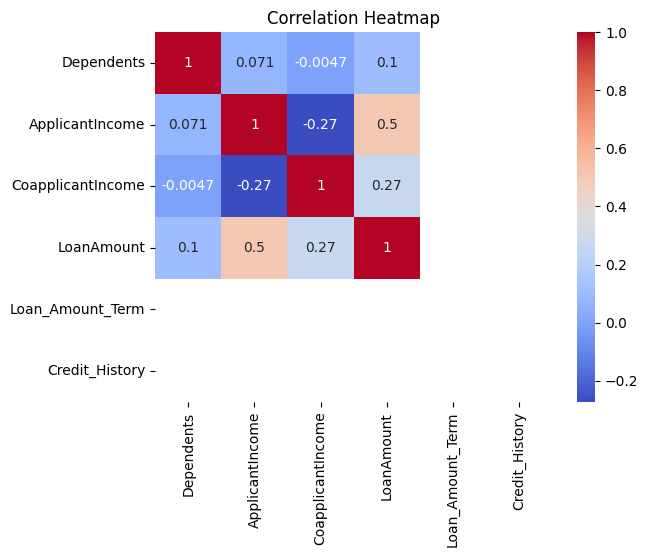

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data_train_cleaned[nu_train].corr()

# Generate a heatmap

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


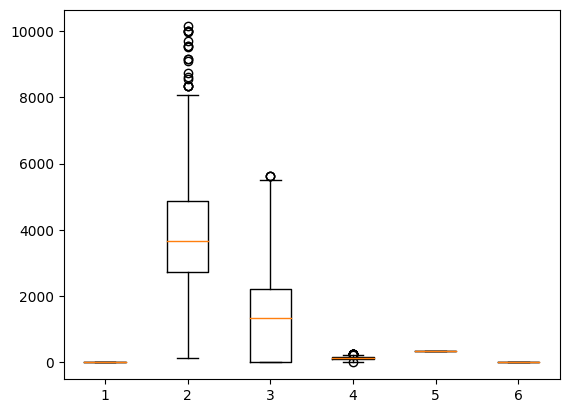

In [ ]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for numerical features vs. Loan_Status
plt.boxplot(data_train_cleaned[nu_train])
plt.show()

<Axes: xlabel='count', ylabel='Loan_Status'>

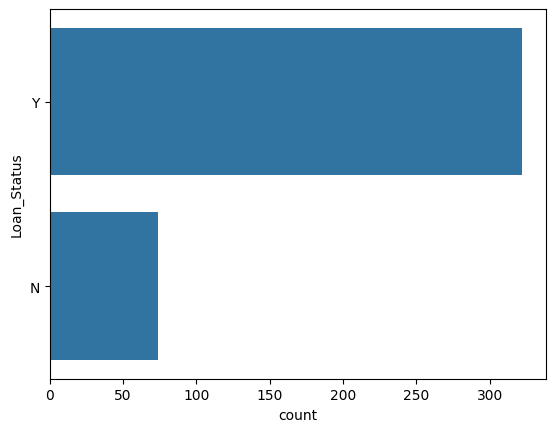

In [ ]:
sns.countplot(data_train_cleaned[categorical_train]["Loan_Status"])

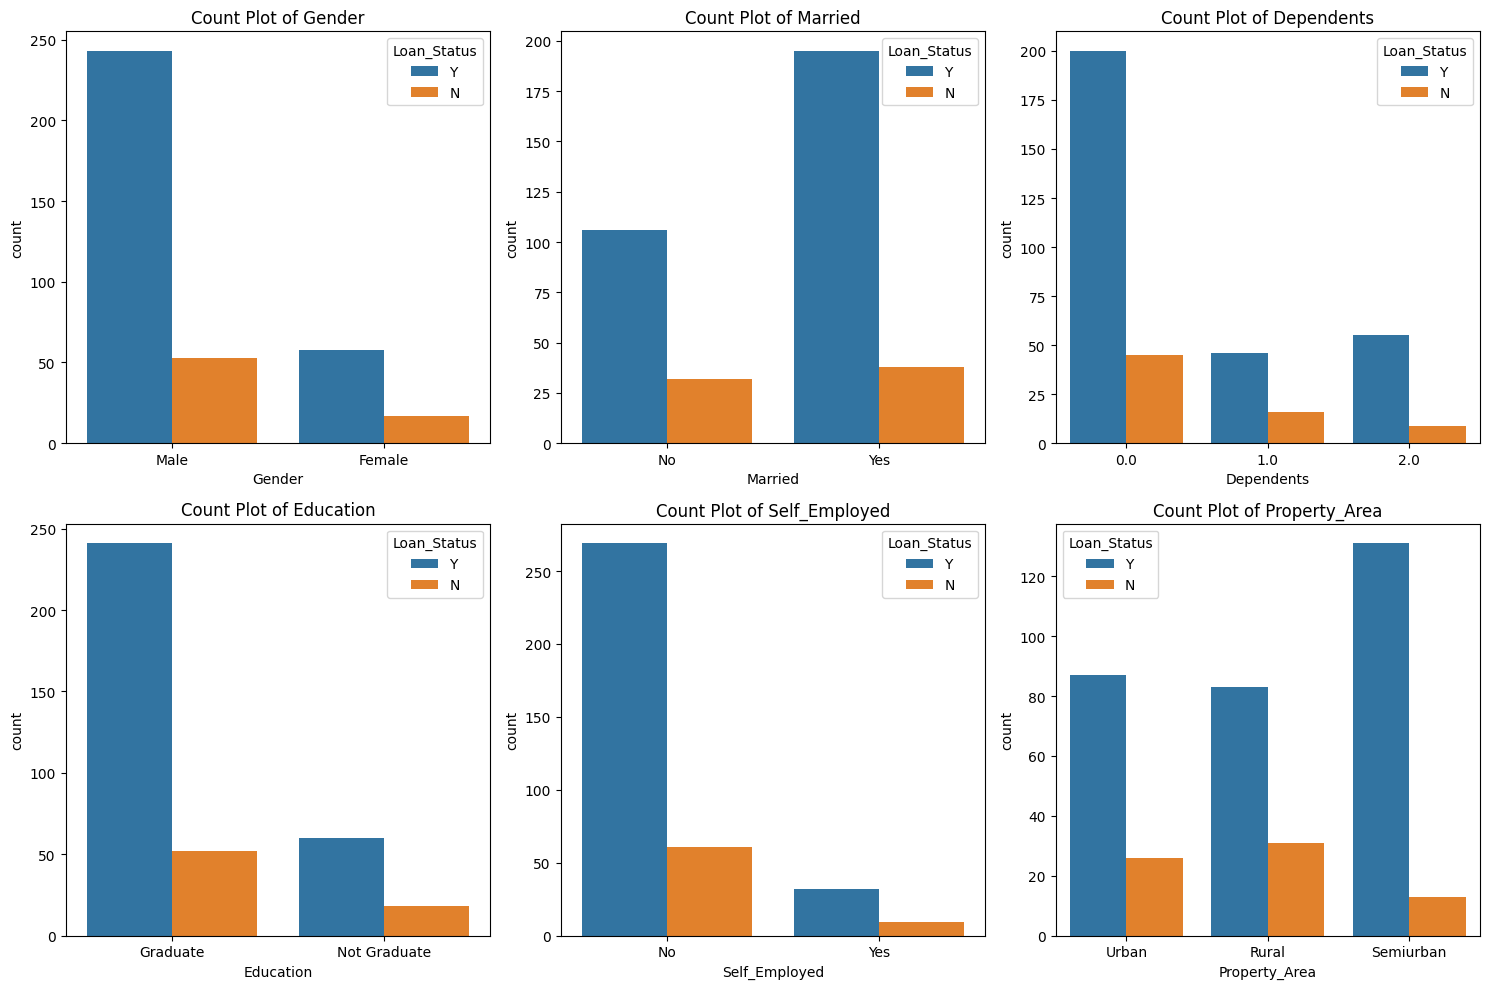

In [ ]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Plot count plots
plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features,1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, data=data_train_cleaned, hue='Loan_Status')
    plt.title(f'Count Plot of {feature}')

plt.tight_layout()
plt.show()


In [ ]:
for i, feature in enumerate(categorical_features,1):
  print(i,feature)

1 Gender
2 Married
3 Dependents
4 Education
5 Self_Employed
6 Property_Area


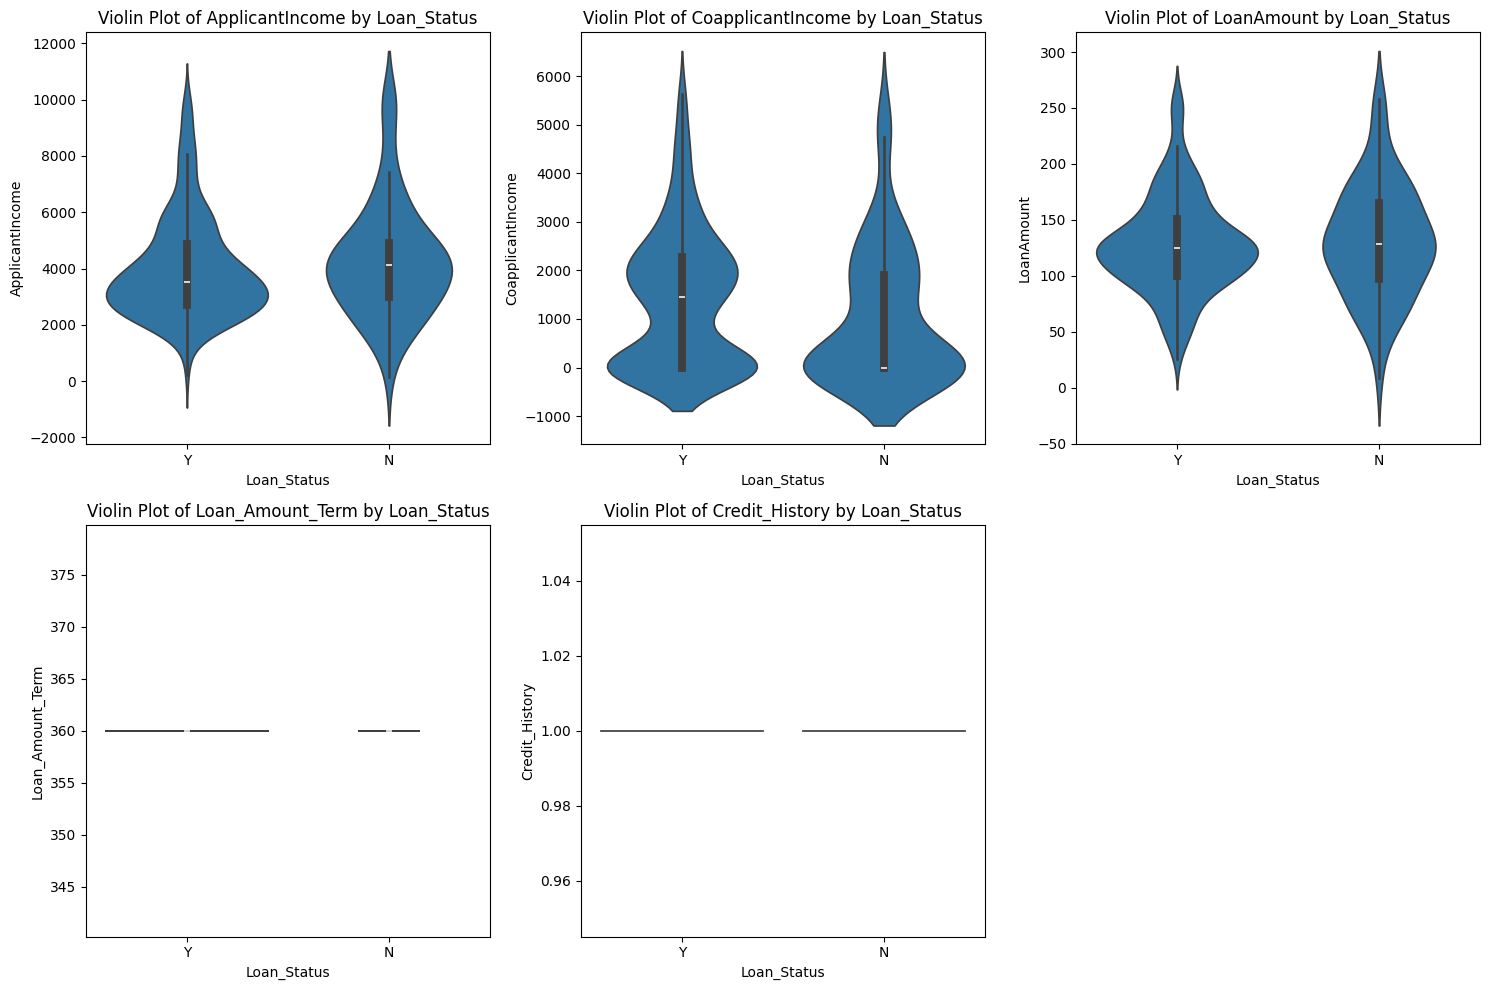

In [ ]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plot violin plots for numerical features vs. Loan_Status
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='Loan_Status', y=feature, data=data_train_cleaned)
    plt.title(f'Violin Plot of {feature} by Loan_Status')

plt.tight_layout()
plt.show()


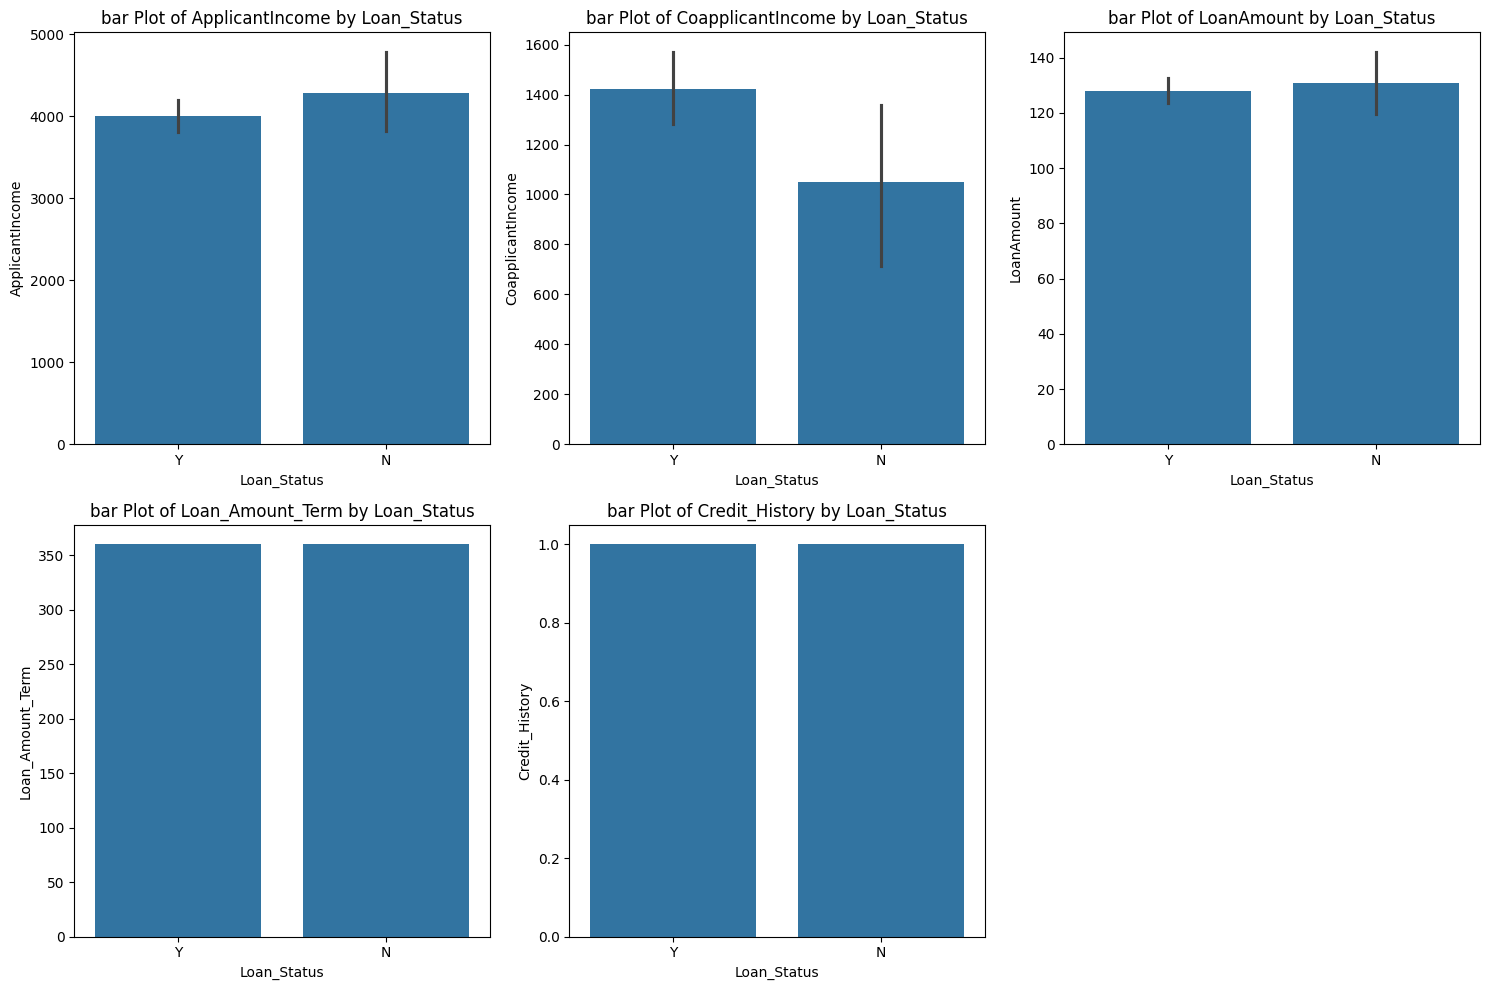

In [ ]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plot violin plots for numerical features vs. Loan_Status
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Loan_Status', y=feature, data=data_train_cleaned)
    plt.title(f'bar Plot of {feature} by Loan_Status')

plt.tight_layout()
plt.show()


In [ ]:
data_train_cleaned

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2.0,Not Graduate,No,3987.0,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0.0,Graduate,No,3232.0,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0.0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y


In [ ]:
data_train_cleaned

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2.0,Not Graduate,No,3987.0,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0.0,Graduate,No,3232.0,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0.0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y


# feature engineering


# 1, lbael encoding

In [ ]:
data_train_cleaned[categorical_train]

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,Graduate,No,Urban,Y
1,Male,Yes,Graduate,No,Rural,N
2,Male,Yes,Graduate,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,Urban,Y
4,Male,No,Graduate,No,Urban,Y
...,...,...,...,...,...,...
607,Male,Yes,Not Graduate,No,Rural,Y
608,Male,Yes,Graduate,No,Rural,Y
609,Female,No,Graduate,No,Rural,Y
611,Male,Yes,Graduate,No,Urban,Y


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of categorical features to be label encoded
categorical_train = data_train_cleaned[categorical_train]
# Initialize LabelEncoder
label_encoders = {}

# Apply label encoding to each categorical feature
for feature in categorical_train:
    le = LabelEncoder()
    data_train_cleaned[feature] = le.fit_transform(data_train_cleaned[feature])
    label_encoders[feature] = le

# Check the encoding results
(data_train_cleaned.head())


<ipython-input-395-d3ab2be93fca>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_cleaned[feature] = le.fit_transform(data_train_cleaned[feature])
<ipython-input-395-d3ab2be93fca>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_cleaned[feature] = le.fit_transform(data_train_cleaned[feature])
<ipython-input-395-d3ab2be93fca>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [ ]:
data_train_cleaned

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
607,1,1,2.0,1,0,3987.0,1411.0,157.0,360.0,1.0,0,1
608,1,1,0.0,0,0,3232.0,1950.0,108.0,360.0,1.0,0,1
609,0,0,0.0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1
611,1,1,1.0,0,0,8072.0,240.0,253.0,360.0,1.0,2,1


# 2. feature selection

In [ ]:
# Define features (X) and target (y)
X = data_train_cleaned[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                        'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = data_train_cleaned['Loan_Status']


# 3. stantardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# model building- machine learning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# model building using logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)



Logistic Regression Model Accuracy: 0.8125
Confusion Matrix:
[[ 0 15]
 [ 0 65]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.81      1.00      0.90        65

    accuracy                           0.81        80
   macro avg       0.41      0.50      0.45        80
weighted avg       0.66      0.81      0.73        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# we can do the same on other models

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting Classifier': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Extract metrics from classification report
    metrics = {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': class_report['weighted avg']['precision'],
        'Recall': class_report['weighted avg']['recall'],
        'F1-Score': class_report['weighted avg']['f1-score']
    }
    results.append(metrics)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by accuracy in descending order
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

# Print the sorted DataFrame
(results_df_sorted)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.8125,0.660156,0.8125,0.728448
3,Support Vector Classifier,0.8125,0.660156,0.8125,0.728448
4,K-Nearest Neighbors Classifier,0.8125,0.660156,0.8125,0.728448
1,Random Forest Classifier,0.7875,0.709704,0.7875,0.734276
2,Gradient Boosting Classifier,0.7625,0.690034,0.7625,0.719296


# ✔ We can check the model on unseen data to predict the loan status

In [ ]:
unseen =pd.read_csv("/content/loan_sanction_test.csv")
unseen

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
unseen.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
unseen=unseen.dropna()

In [ ]:
unseen=unseen.drop("Loan_ID",axis=1)

In [ ]:
unseen

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
361,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of categorical features to be label encoded
categorical_train = unseen[categorical_features]
# Initialize LabelEncoder
label_encoders = {}

# Apply label encoding to each categorical feature
for feature in categorical_train:
    le = LabelEncoder()
    unseen[feature] = le.fit_transform(unseen[feature])
    label_encoders[feature] = le

# Check the encoding results
(unseen.head())

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
5,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2


In [ ]:
test_scaled = scaler.fit_transform(unseen)

# Make predictions
y_pred = model.predict(test_scaled)

# Optionally, add predictions to the test data and save or display the results
unseen['Predicted_Loan_Status'] = y_pred

In [ ]:
unseen

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Loan_Status
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,1
5,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,1,1,0,0,2269,2167,99.0,360.0,1.0,1,1
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2,1
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0,1


In [ ]:
unseen["Predicted_Loan_Status"].value_counts()

,count
Predicted_Loan_Status,
1,279
0,10
